In [1]:
import pandas as pd
import numpy as np

In [4]:
sismos_eeuu= pd.read_csv('..\DASHBOARD\CSV_TRANSFORMADOS\Datos_USA.csv')

In [5]:
sismos_eeuu.head()

,id,Magnitud,Place,Primer Registro,Ultimo registro,Felt,cdi,mmi,Posibilidad tsunami,Importancia del evento,ids,nst,Dist Horizontal epicentro,RMS,Brecha azimutal,Longitud,Latitud,Profundidad,estado
0,nc73888821,2.83,58km WNW of Petrolia,2023-05-16 16:22:09.380,2023-05-17 02:32:10.393,NaN,NaN,NaN,0,123,",nc73888821,us6000kcbg,",21.0,0.58120,0.28,289.0,-124.955833,40.425335,-0.37,California
1,nc73888746,3.24,2km NNE of Almanor,2023-05-16 11:37:26.630,2023-05-16 23:58:52.060,18.0,4.3,NaN,0,169,",nc73888746,nn00859587,us6000kc9f,",42.0,0.02014,0.20,33.0,-121.167833,40.237167,6.02,California
2,ok2023jmlz,2.98,8 km NW of Prague,2023-05-15 21:30:20.910,2023-05-16 00:59:31.375,6.0,3.7,NaN,0,139,",ok2023jmlz,us6000kc5i,",90.0,0.00000,0.14,34.0,-96.749667,35.536000,7.81,Oklahoma
3,nc73888511,2.60,3km NNE of Prattville,2023-05-15 17:38:58.740,2023-05-15 23:58:18.995,2.0,2.0,NaN,0,104,",nc73888511,nn00859567,",36.0,0.01564,0.18,44.0,-121.142833,40.232167,6.76,California
4,nc73888396,2.63,41km W of Ferndale,2023-05-15 11:35:46.410,2023-05-15 17:11:12.082,NaN,NaN,NaN,0,106,",nc73888396,",25.0,0.47330,0.16,294.0,-124.746002,40.527000,20.25,California


In [6]:
sismos_eeuu.info

<bound method DataFrame.info of                 id  Magnitud                        Place  \
0       nc73888821      2.83         58km WNW of Petrolia   
1       nc73888746      3.24           2km NNE of Almanor   
2       ok2023jmlz      2.98            8 km NW of Prague   
3       nc73888511      2.60        3km NNE of Prattville   
4       nc73888396      2.63           41km W of Ferndale   
...            ...       ...                          ...   
142588   ci3328666      3.15         14km N of Los Alamos   
142589   ci3328664      3.81           64km ENE of Beatty   
142590   ci3328663      3.63  14km ENE of Borrego Springs   
142591   ci3328661      2.68           16km WNW of Malibu   
142592   ci3328660      2.58     5km NNW of Moreno Valley   

                Primer Registro          Ultimo registro  Felt  cdi  mmi  \
0       2023-05-16 16:22:09.380  2023-05-17 02:32:10.393   NaN  NaN  NaN   
1       2023-05-16 11:37:26.630  2023-05-16 23:58:52.060  18.0  4.3  NaN   
2      

In [7]:
sismos_eeuu = sismos_eeuu.loc[:, ['Magnitud', 'Longitud', 'Latitud', 'Profundidad']]

In [8]:
sismos_eeuu.head()

,Magnitud,Longitud,Latitud,Profundidad
0,2.83,-124.955833,40.425335,-0.37
1,3.24,-121.167833,40.237167,6.02
2,2.98,-96.749667,35.536000,7.81
3,2.60,-121.142833,40.232167,6.76
4,2.63,-124.746002,40.527000,20.25


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Scikit-learn proporciona una variedad de algoritmos de clustering para analizar y agrupar datos. En particular, KMeans es un algoritmo de 
#clustering muy utilizado que agrupa los datos en k grupos (donde k es un número predefinido) según la similitud entre ellos. 
#El objetivo de este algoritmo es minimizar la suma de las distancias al cuadrado entre cada punto y su centroide correspondiente.

#Matplotlib.pyplot proporciona herramientas para crear gráficos y visualizaciones en Python. Esta librería es muy útil para visualizar los 
#resultados de los análisis de datos, como los resultados de los algoritmos de clustering. Ofrece una amplia variedad de opciones de visualización, 
#incluyendo gráficos de líneas, de barras, de dispersión, entre otros.

In [10]:
max_magnitud = sismos_eeuu['Magnitud'].max()
min_magnitud = sismos_eeuu['Magnitud'].min()

In [11]:
print(max_magnitud)

7.3


In [12]:
print(min_magnitud)

2.12


Magnitud de Escala Richter
3.5 - 5.4 A menudo se siente, pero sólo causa daños menores. 
5.5 - 6.0 Ocasiona daños ligeros a edificios. 
6.1 - 6.9 Puede ocasionar daños severos en áreas muy pobladas. 
7.0 - 7.9 Terremoto mayor.

Vamos a asociar una columna llamada peligrosidad al datafrmae, que depende únicamente de la magnitud del sismo (más adelante podemos agregarle mas variables) siguiendo los rangos de la Escala de Ritcher

In [13]:
Escala_Ritcher = [
    (sismos_eeuu['Magnitud'] >= 7.0),
    (sismos_eeuu['Magnitud'] > 6.0)  & (sismos_eeuu['Magnitud'] <7.0),
    (sismos_eeuu['Magnitud'] > 5.4) & (sismos_eeuu['Magnitud'] <=6.0),
    (sismos_eeuu['Magnitud'] <= 5.4)]
peligrosidad = [3, 2, 1, 0]                           
                                                      
sismos_eeuu['Peligrosidad'] = np.select(Escala_Ritcher, peligrosidad, default='Not Specified')

In [14]:
sismos_eeuu.sample(10)

,Magnitud,Longitud,Latitud,Profundidad,Peligrosidad
65317,2.55,-118.334167,35.989333,3.882000,0
2917,2.50,-104.385674,31.665873,7.288428,0
111358,2.60,-122.187333,46.196333,-0.539000,0
129367,3.00,-90.080000,35.840000,13.800000,0
113046,2.68,-117.680000,35.030000,-0.791000,0
26415,2.53,-121.249833,36.638000,5.180000,0
57295,3.00,-122.190500,46.198000,-0.771000,0
82535,3.18,-118.556000,34.208000,16.580000,0
122771,3.00,-122.241667,46.344500,9.462000,0
38546,2.99,-115.811167,32.624667,9.118000,0


In [15]:
sismos_eeuu[sismos_eeuu['Magnitud'] > 5.5]  #Para chequear que se haya agregado correctamente, ya que con en el head solo me salian registros 
#con magnitudes peuqeñas

,Magnitud,Longitud,Latitud,Profundidad,Peligrosidad
1061,6.40,-124.423000,40.525000,17.91,2
1273,6.20,-116.390700,30.793600,10.00,2
1415,6.10,-112.310600,28.157300,10.00,2
3753,6.20,-124.298000,40.390167,27.04,2
3754,5.65,-124.626000,40.297833,16.51,1
...,...,...,...,...,...
142338,5.61,-114.343000,31.195000,10.00,1
142339,6.02,-114.417000,31.296000,10.00,2
142340,5.56,-114.442000,31.276000,10.00,1
142343,5.70,-114.315000,31.205000,10.00,1


In [16]:
nan_count = sismos_eeuu.isna().sum().sum()
print("Valores NaN en DataFrame original:", nan_count)

Valores NaN en DataFrame original: 28


In [17]:
sismos_eeuu = sismos_eeuu.dropna()

In [18]:
#Tomamos una muestra aleatoria de 12000 registros

sismos_eeuu =sismos_eeuu.sample(n=12000, random_state=10)

C:\Users\claud\AppData\Local\Temp\ipykernel_4332\357200677.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = sismos_eeuu.corr()


[Text(0.5, 0, 'Magnitud'),
 Text(1.5, 0, 'Longitud'),
 Text(2.5, 0, 'Latitud'),
 Text(3.5, 0, 'Profundidad')]

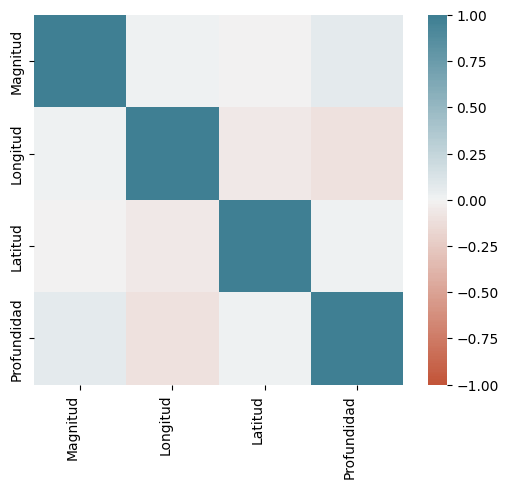

In [19]:
#creamos la matriz de correlacion
matriz_correlacion = sismos_eeuu.corr()
ax = sns.heatmap(
    matriz_correlacion, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)

Escalamos datos para comparar la influencia de cada variable de manera más justa, teniendo en cuenta su importancia relativa

In [20]:
x = sismos_eeuu.values 
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

**SALTAR ESTA PARTE HASTA EL SIGUIENTE AVISO

In [21]:
# Utiliza el método applymap() para intentar convertir todos los elementos del dataframe a float
# Si alguno de los elementos no se puede convertir a float, se generará un error
try:
    sismos_eeuu.applymap(float)
except ValueError as e:
    # El error generado contiene información sobre el elemento que no se pudo convertir a float
    print(e)

In [22]:
columnas_con_error = []
for columna in sismos_eeuu.columns:
    try:
        sismos_eeuu[columna].astype(float)
    except ValueError:
        columnas_con_error.append(columna)
        
fila_error = sismos_eeuu[sismos_eeuu.isin(['Idaho'])].dropna(how='all')
print("La fila que contiene el error está en la columna:", columnas_con_error)
print(fila_error)

La fila que contiene el error está en la columna: []
Empty DataFrame
Columns: [Magnitud, Longitud, Latitud, Profundidad, Peligrosidad]
Index: []


In [23]:
sismos_eeuu = sismos_eeuu.drop(index=19778)

KeyError: '[19778] not found in axis'

In [ ]:
x = sismos_eeuu.values 
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

ValueError: could not convert string to float: 'tx2021tean'

In [ ]:
columnas_con_error = []
for columna in sismos_eeuu.columns:
    try:
        sismos_eeuu[columna].astype(float)
    except ValueError:
        columnas_con_error.append(columna)
        
fila_error = sismos_eeuu[sismos_eeuu.isin(['tx2021tean'])].dropna(how='all')
print("La fila que contiene el error está en la columna:", columnas_con_error)
print(fila_error)

La fila que contiene el error está en la columna: ['id', 'estado']
              id estado  Magnitud  Importancia del evento  \
4376  tx2021tean    NaN       NaN                     NaN   

      Dist Horizontal epicentro  Brecha azimutal  Longitud  Latitud  \
4376                        NaN              NaN       NaN      NaN   

      Profundidad Peligrosidad  
4376          NaN          NaN  


In [ ]:
sismos_eeuu = sismos_eeuu.drop(index=4376)

In [ ]:
x = sismos_eeuu.values 
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

ValueError: could not convert string to float: 'nn00746659'

In [24]:
# Escala los datos usando MinMaxScaler
x = sismos_eeuu.values 
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

# Busca las columnas con errores
columnas_con_error = []
for columna in sismos_eeuu.columns:
    try:
        sismos_eeuu[columna].astype(float)
    except ValueError:
        columnas_con_error.append(columna)

# Imprime las columnas con error
print("Las filas con errores se encuentran en las siguientes columnas:", columnas_con_error)

# Borra las filas con errores
for col in columnas_con_error:
    sismos_eeuu = sismos_eeuu[~sismos_eeuu[col].isin(['tx2021tean'])]

# Imprime la cantidad de filas borradas
print("Se borraron", len(columnas_con_error), "filas con errores")

# Escala los datos de nuevo (ahora sin los datos erróneos)
x = sismos_eeuu.values 
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

Las filas con errores se encuentran en las siguientes columnas: []
Se borraron 0 filas con errores


In [25]:

# Copia del dataframe original
sismos_eeuu_copy = sismos_eeuu.copy()

# Lista para almacenar las columnas con errores
columnas_con_error = []

# Iterar sobre las columnas del dataframe
for columna in sismos_eeuu_copy.columns:
    try:
        # Convertir la columna a tipo float
        sismos_eeuu_copy[columna] = sismos_eeuu_copy[columna].astype(float)
    except ValueError:
        # Registrar la columna con problemas
        columnas_con_error.append(columna)

# Eliminar las filas con valores nulos
sismos_eeuu_copy.dropna(inplace=True)

# Escalar los valores del dataframe
x = sismos_eeuu_copy.values 
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

# Imprimir las columnas con errores
print("Las columnas con errores son:", columnas_con_error)

# Imprimir las filas con valores nulos
fila_error = sismos_eeuu[sismos_eeuu.isin(['nn00746659'])].dropna(how='all')
print("La fila que contiene el error es:", fila_error)

# Eliminar la fila con el valor erróneo
sismos_eeuu.drop(fila_error.index, inplace=True)

Las columnas con errores son: []
La fila que contiene el error es: Empty DataFrame
Columns: [Magnitud, Longitud, Latitud, Profundidad, Peligrosidad]
Index: []


**LISTO, HASTA ACÁ. AHORA SEGUIMOS

In [26]:
X_norm

,0,1,2,3,4
0,0.022727,0.436506,0.467541,0.105303,0.0
1,0.031818,0.137611,0.350918,0.190626,0.0
2,0.009091,0.128086,0.412256,0.086705,0.0
3,0.293182,0.114984,0.370286,0.129379,0.0
4,0.161364,0.005686,0.617961,0.257803,0.0
...,...,...,...,...,...
11995,0.006818,0.134072,0.359457,0.195024,0.0
11996,0.022727,0.089346,0.679105,0.042473,0.0
11997,0.113636,0.329775,0.749797,0.042473,0.0
11998,0.084091,0.145211,0.394478,0.152350,0.0


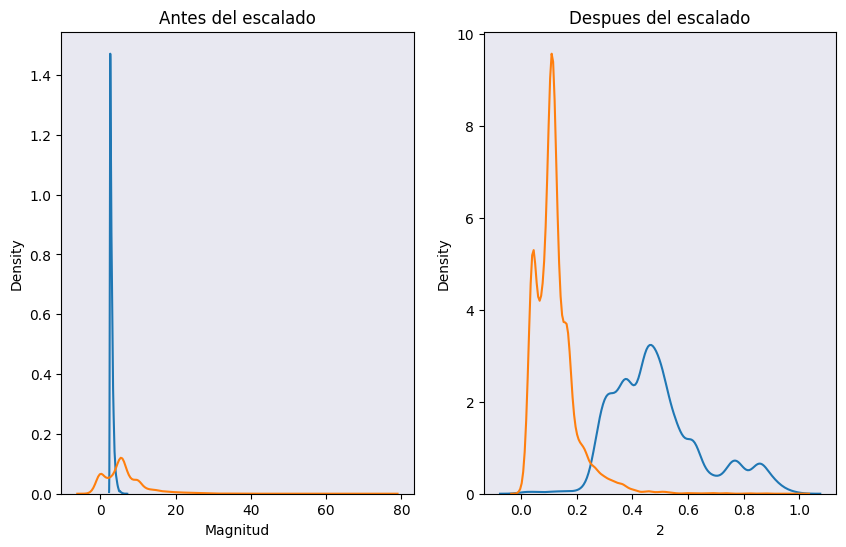

In [27]:
#Graficos de las distribuciones de densidad de probabilidad (KDE, Kernel Density Estimation) de las columnas "Magnitud" y "Profundidad"
#antes y despues del escalado de datos.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6))

ax1.set_facecolor('#E8E8F1')
ax2.set_facecolor('#E8E8F1')

ax1.set_title('Antes del escalado')
sns.kdeplot(sismos_eeuu['Magnitud'], ax=ax1)
sns.kdeplot(sismos_eeuu['Profundidad'], ax=ax1)

ax2.set_title('Despues del escalado')
sns.kdeplot(X_norm[2], ax=ax2)
sns.kdeplot(X_norm[3], ax=ax2)

plt.show()

In [28]:
#Generamos los PCA para reducir la dimensionalidad de un conjunto de datos.
#(La idea principal detrás del PCA es encontrar las características principales o los componentes principales que resuman la mayor cantidad 
#de variabilidad en los datos originales. Los componentes principales son combinaciones lineales de las características originales del conjunto 
#de datos.)

pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [29]:
reduced

,0,1
0,-0.071075,0.260175
1,-0.129041,-0.060181
2,-0.069208,-0.051206
3,-0.109182,-0.067504
4,0.158148,-0.141670
...,...,...
11995,-0.119716,-0.063043
11996,0.199038,-0.036328
11997,0.223778,0.214650
11998,-0.088880,-0.040543


In [30]:
#análisis de clustering utilizando el algoritmo de KMeans de la librería sklearn.

#especificamos numeros de clusters
kmeans = KMeans(n_clusters=4, n_init=10)
# entrenamos
kmeans = kmeans.fit(reduced)
# predecimos
labels = kmeans.predict(reduced)
# verificamos centroides
centroid = kmeans.cluster_centers_
# guardamos una lista con los clusters
clusters = kmeans.labels_.tolist()

In [31]:
#Ahora vamos a seguir trabjaando con el dataframe reduced creado anteriormente, pero le tengo que añadir algunosdatos del sismos_eeuu

lista_peligrosidad= sismos_eeuu.Peligrosidad.tolist()

In [32]:
reduced['Cluster'] = clusters
reduced['Peligrosidad'] = lista_peligrosidad
reduced.columns = ['A','B','Cluster', 'Peligrosidad']
reduced

,A,B,Cluster,Peligrosidad
0,-0.071075,0.260175,0,0
1,-0.129041,-0.060181,3,0
2,-0.069208,-0.051206,3,0
3,-0.109182,-0.067504,3,0
4,0.158148,-0.141670,1,0
...,...,...,...,...
11995,-0.119716,-0.063043,3,0
11996,0.199038,-0.036328,2,0
11997,0.223778,0.214650,2,0
11998,-0.088880,-0.040543,3,0


In [33]:
#vamos a ver cuantos objetos con características similares hay por cada grupo, para eso agrupamos por Cluster
print(reduced.groupby('Cluster').size())

Cluster
0    1284
1    4768
2    1737
3    4211
dtype: int64


In [34]:
#Vamos a ver en nuestra clasificacion de peligrosidad si se parece en algo
print(reduced.groupby('Peligrosidad').size())

Peligrosidad
0    11972
1       23
2        5
dtype: int64
